# TP - Sentiment Analysis

First approach to the work:
- Unbalanced dataset
- TF-IDF


## Imports and data loading

In [ ]:
!python --version

Python 3.8.16


In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
# "Mount" do Google Drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/sentiment_analysis_exp1.csv')

df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Phrase,Target
0,always experience gf gone first like oh cool m...,Neutral
1,right people maybe wont kill feel isolated lon...,Negative
2,know youre lonely come promise take care,Positive
3,give boost lonely she28ric,Positive
4,getting lonely top,Negative
...,...,...
2044,nope antidepressants fucked,Negative
2045,nnn antidepressants year 13 year old would proud,Positive
2046,antidepressants wild two weeks ago unhinged im...,Positive
2047,tbh netflix na antidepressant,Neutral


## Class distribution

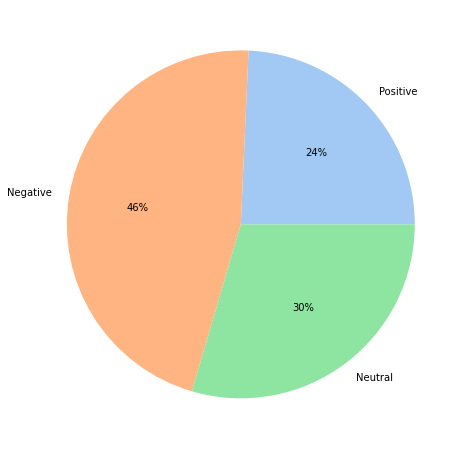

In [ ]:
# Class distribution

countPositives = df[df.Target == 'Positive'].Target.count()
countNegatives = df[df.Target == 'Negative'].Target.count()
countNeutral = df[df.Target == 'Neutral'].Target.count()

data = [countPositives,countNegatives,countNeutral]
labels = ['Positive', 'Negative', 'Neutral']

colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(12, 8))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

## TF-IDF

In [ ]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df.Phrase)
dense = vectors.todense()

df['vectorTdfIdf'] = dense.tolist()

In [ ]:
print(vectorizer.get_feature_names())

['000', '001', '02', '10', '100', '100x', '11', '12', '13', '1312', '14', '145', '15', '19', '1971', '20', '2006', '2011', '2013', '2014', '2015', '2017', '2018', '2019', '2020', '2021', '2022', '20s', '21', '22', '223', '23', '253days', '258', '263', '273', '2km', '30', '30pm', '30s', '33', '35', '37', '3days', '3l', '40', '40s', '42', '43', '4424', '45', '4929', '4am', '4ever', '4koma', '4th', '50', '504', '512', '663', '70k', '75', '7am', '7p', '80', '800', '82', '8255', '85', '8th', '90', '911', '95', 'a3', 'aaaaaalwaysssss', 'aaaaah', 'aaaah', 'aaron', 'aback', 'abandon', 'abandoned', 'abbey', 'ability', 'abject', 'able', 'abortion', 'about', 'absence', 'absolute', 'absolutely', 'abt', 'abuse', 'abusers', 'abusive', 'academic', 'accentuated', 'accept', 'acceptance', 'accepted', 'accepting', 'access', 'accessible', 'accident', 'accidentally', 'accommodations', 'accomplish', 'accomplished', 'accordingly', 'account', 'accountability', 'accountable', 'accumulate', 'accusations', 'accu

In [ ]:
df_final = pd.DataFrame(data = dense.tolist(), columns = vectorizer.get_feature_names())
df_final['Target'] = df.Target

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Columns: 4869 entries, 000 to Target
dtypes: float64(4868), object(1)
memory usage: 76.1+ MB


In [ ]:
from pycaret.classification import *

In [ ]:
# Pre-processing steps to fix target 

for i, value in enumerate(df_final['Target']):
  df_final['Target'][i] = value.strip()
  if value == 'Nuetral':
    df_final['Target'][i] = 'Neutral'

In [ ]:
df_final['Target'].unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

In [ ]:
df_final

,000,001,02,10,100,100x,11,12,13,1312,14,145,15,19,1971,20,2006,2011,2013,2014,2015,2017,2018,2019,2020,2021,2022,20s,21,22,223,23,253days,258,263,273,2km,30,30pm,30s,33,35,37,3days,3l,40,40s,42,43,4424,45,4929,4am,4ever,4koma,4th,50,504,512,663,70k,75,7am,7p,80,800,82,8255,85,8th,90,911,95,a3,aaaaaalwaysssss,aaaaah,aaaah,aaron,aback,abandon,abandoned,abbey,ability,abject,able,abortion,about,absence,absolute,absolutely,abt,abuse,abusers,abusive,academic,accentuated,accept,acceptance,accepted,accepting,access,accessible,accident,accidentally,accommodations,accomplish,accomplished,accordingly,account,accountability,accountable,accumulate,accusations,accustomed,achieve,achieving,acidosis,acknowledge,across,act,acting,action,activating,active,activities,activity,actors,acts,actual,actually,ad,adapt,add,adderall,addicted,addiction,adding,additional,addressing,adhd,adj,admire,admit,adolescents,adopting,adorable,adoring,adorn,adrianna,ads,adult,adults,advent,adventure,advertise,advertisers,advice,advise,aesthetic,af,affairs,affect,affection,affliction,affluent,afford,afraid,african,afterwards,age,ageless,agent,ages,agh,ago,agony,agree,agreement,ah,ahead,ahhh,ahhhhh,aimed,aiming,aint,air,airpod,ajdhsahaaaaaaa,ajg,ajitators,albatross,alcohol,alcoholic,alcoholics,alex,alhamdulillah,alice,alicia,alien,alienated,alienation,alive,allah,allahs,allergies,allllllll,allowed,allowing,almighty,almost,alone,along,alot,alr,already,alright,also,alter,alternatives,altho,although,always,alwaysssss,ama,amarette,amazing,ambition,ambivalence,amen,america,american,americans,amid,amitriptyline,amongst,amoral,amount,amp,amy,analyzing,anchor,ancient,andrei,andy,anecdote,angel,anger,angry,animal,animals,...,vol,volunteer,volunteers,vote,voted,voting,vs,vulnerable,waaaay,wagmi,waifu,wail,wait,waiting,wakanda,wake,wakeee,waking,walgreens,walk,walked,walker,walks,wall,wallpaper,wandered,wanna,want,wanted,wantibg,wanting,wants,war,warm,warmth,wars,wash,wasnt,waste,wasted,watch,watched,watches,watching,water,wave,waves,way,wayne,ways,wayyyy,wbssb,weak,weakling,weakness,wealth,weaners,weaning,wear,wearing,wears,weather,web,wed,wedding,wednesday,wee,weed,week,weekdaysbut,weekend,weeks,weep,weighed,weighing,weighs,weight,weights,weighty,weird,weirdest,wel,welcome,well,wellbutrin,welp,wemen,wendell,wendy,went,wentt,werent,western,westminster,weve,whale,whatever,whats,whatsoever,whattttt,whence,whenever,whereof,wheres,whether,whichhhhhh,whining,whispers,whit,white,whole,wholesome,whore,whos,whys,wibu,wicked,widens,widespread,widower,wife,wild,wilderness,wilhelm,wille,willed,williams,willing,willow,win,wind,windows,windswept,wine,wing,wings,winners,wins,winter,wiped,wise,wish,wishes,wishing,withdrawal,withdrawals,within,without,witness,wok,woke,wolf,wolves,woman,women,wonder,wonderful,wondering,wont,woods,wooonn,wooooook,word,words,work,worked,workers,working,workout,works,world,worlds,worn,worried,worry,worse,worst,worth,worthless,worthy,would,wouldnt,wow,wrap,wreck,wrinkles,wrist,write,writer,writers,writing,written,wrong,wrote,wtf,wtv,xbox,xd,xe,xer,xx,ya,yada,yall,ye,yea,yeah,year,yearn,yearning,years,yell,yelling,yelped,yeonbin,yep,yes,yess,yesss,yesterday,yet,yh,yo,yoga,york,youd,youll,young,younger,youre,yourrrr,youth,youuu,youve,yr,yt,yummyyyy,zapping,zaps,zel,zelink,zen,zero,zhdhshs,zhongli,zizzy,zodiacs,zone,zzzzzzzzzz,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

### Classification with PyCaret

In [ ]:
# 70/30 - train and test split by default

exp_1 = setup(data=df_final, target='Target', numeric_features=df_final.drop(['Target'], axis=1).columns.tolist())

,Description,Value
0,session_id,8192
1,Target,Target
2,Target Type,Multiclass
3,Label Encoded,"Negative: 0, Neutral: 1, Positive: 2"
4,Original Data,"(2049, 4869)"
5,Missing Values,False
6,Numeric Features,4868
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['000', '001', '02',
                                                          '10', '100', '100x',
                                                          '11', '12', '13',
                                                          '1312', '14', '145',
                                                          '15', '19', '1971',
                                                          '20', '2006', '2011',
                                                          '2013', '2014',
                                 

In [ ]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.5830,0.0000,0.5420,0.5828,0.5737,0.3242,0.3305,0.229
et,Extra Trees Classifier,0.5795,0.7390,0.5296,0.5841,0.5650,0.3094,0.3191,3.178
rf,Random Forest Classifier,0.5718,0.7384,0.5180,0.5859,0.5560,0.2971,0.3067,2.343
lr,Logistic Regression,0.5705,0.7486,0.5029,0.5869,0.5435,0.2779,0.2994,2.262
svm,SVM - Linear Kernel,0.5565,0.0000,0.5305,0.5568,0.5534,0.2980,0.2997,0.914
gbc,Gradient Boosting Classifier,0.5523,0.7111,0.4982,0.5544,0.5349,0.2615,0.2714,12.762
ada,Ada Boost Classifier,0.5502,0.6701,0.5104,0.5469,0.5409,0.2771,0.2812,1.735
lightgbm,Light Gradient Boosting Machine,0.5300,0.6783,0.4887,0.5216,0.5202,0.2454,0.2482,0.553
dt,Decision Tree Classifier,0.5196,0.6166,0.4859,0.5159,0.5134,0.2346,0.2365,0.268
dummy,Dummy Classifier,0.4651,0.5000,0.3333,0.2164,0.2953,0.0000,0.0000,0.034


INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 5
INFO:logs:[RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=8192,
                solver='auto', tol=0.001), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=8192, verbose=0,
                     warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
             

In [ ]:
cmp_results = pull()

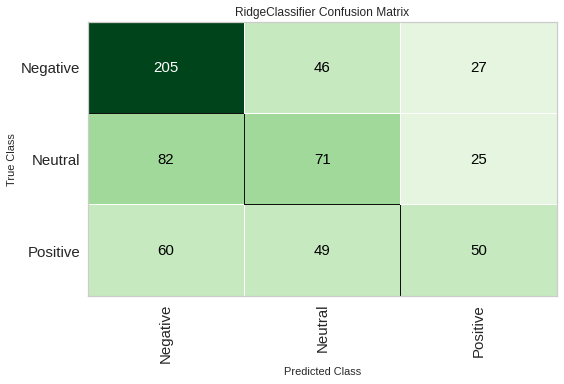

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(top3[0], plot = 'confusion_matrix')

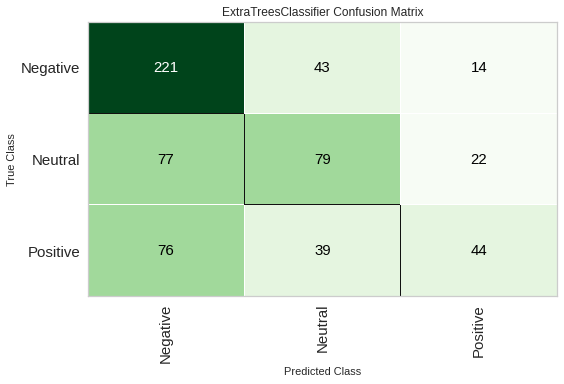

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(top3[1], plot = 'confusion_matrix')

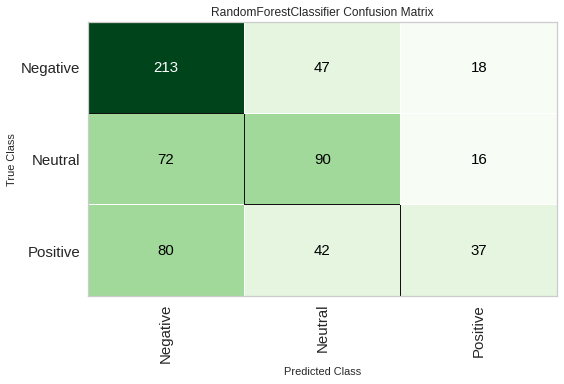

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(top3[2], plot = 'confusion_matrix')

In [ ]:
predict_model(top3[0])

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=8192,
                solver='auto', tol=0.001), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.5301,0,0.4836,0.5176,0.5151,0.2469,0.2515


,000,10,100,100x,11,12,13,14,145,19,...,zapping,zaps,zelink,zen,zero,zhdhshs,zizzy,zone,Target,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative,Positive
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative,Negative
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative,Negative
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative,Negative
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,Neutral
611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,Negative
612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,Negative
613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,Negative


In [ ]:
bm_results = pull()

In [ ]:
cmp_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.5830,0.0000,0.5420,0.5828,0.5737,0.3242,0.3305,0.229
et,Extra Trees Classifier,0.5795,0.7390,0.5296,0.5841,0.5650,0.3094,0.3191,3.178
rf,Random Forest Classifier,0.5718,0.7384,0.5180,0.5859,0.5560,0.2971,0.3067,2.343
lr,Logistic Regression,0.5705,0.7486,0.5029,0.5869,0.5435,0.2779,0.2994,2.262
svm,SVM - Linear Kernel,0.5565,0.0000,0.5305,0.5568,0.5534,0.2980,0.2997,0.914
gbc,Gradient Boosting Classifier,0.5523,0.7111,0.4982,0.5544,0.5349,0.2615,0.2714,12.762
ada,Ada Boost Classifier,0.5502,0.6701,0.5104,0.5469,0.5409,0.2771,0.2812,1.735
lightgbm,Light Gradient Boosting Machine,0.5300,0.6783,0.4887,0.5216,0.5202,0.2454,0.2482,0.553
dt,Decision Tree Classifier,0.5196,0.6166,0.4859,0.5159,0.5134,0.2346,0.2365,0.268
dummy,Dummy Classifier,0.4651,0.5000,0.3333,0.2164,0.2953,0.0000,0.0000,0.034


In [ ]:
bm_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.5301,0,0.4836,0.5176,0.5151,0.2469,0.2515


In [ ]:
cmp_results.to_csv('compare_results_exp1.csv')
bm_results.to_csv('best_model_results_exp1.csv')